# COVID-19 Bangladesh Confirmed Cases and Fatalities Forecasting

**In this notebook, the model will be predicting the cumulative number of confirmed COVID19 cases in Bangladesh, as well as the number of resulting fatalities, for future dates. We understand this is a serious situation, and in no way want to trivialize the human impact this crisis is causing by predicting fatalities. Our goal is to provide better methods for estimates that can assist medical and governmental institutions to prepare and adjust as pandemics unfold. In this particular notebook Lasso regression algorithm with polynomial feature used.**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths_US.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed_US.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv


Loading Total Data

In [3]:
train=pd.read_csv('/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv')

Seperate Bangladesh Data

In [4]:
bd=train[(train['Country/Region']=='Bangladesh')]
bd.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
4126,4127,03/08/2020,NaN,Bangladesh,2020-03-08T10:53:02,3.0,0.0,0.0
4385,4386,03/09/2020,NaN,Bangladesh,2020-03-08T10:53:02,3.0,0.0,0.0
4658,4659,03/10/2020,NaN,Bangladesh,2020-03-10T06:19:32,3.0,0.0,0.0
4877,4878,03/11/2020,NaN,Bangladesh,2020-03-10T06:19:32,3.0,0.0,0.0
5098,5099,03/12/2020,NaN,Bangladesh,2020-03-10T06:19:32,3.0,0.0,0.0


Confirmed Cases Forecasting

In [5]:
sp=bd.shape[0]

In [6]:
X=np.linspace(1, sp, sp).reshape(-1, 1)
y_cc=bd.Confirmed
y_ft=bd.Deaths

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
poly=PolynomialFeatures(4)
X_trans=poly.fit_transform(X)
model=Lasso()
model.fit(X_trans, y_cc)
model.score(X_trans, y_cc)

0.9925966678933211

In [8]:
X_test=np.linspace(sp+1, sp+90, 90).reshape(-1, 1)
X_trans_test=poly.fit_transform(X_test)

In [9]:
y_pred_cc=np.round(model.predict(X_trans_test))
y_cc=y_cc.values

In [10]:
y_confirmed= np.append(y_cc, y_pred_cc)
X_time=np.append(X,X_test)
dates = pd.date_range('03/08/2020', periods=X_time.shape[0])

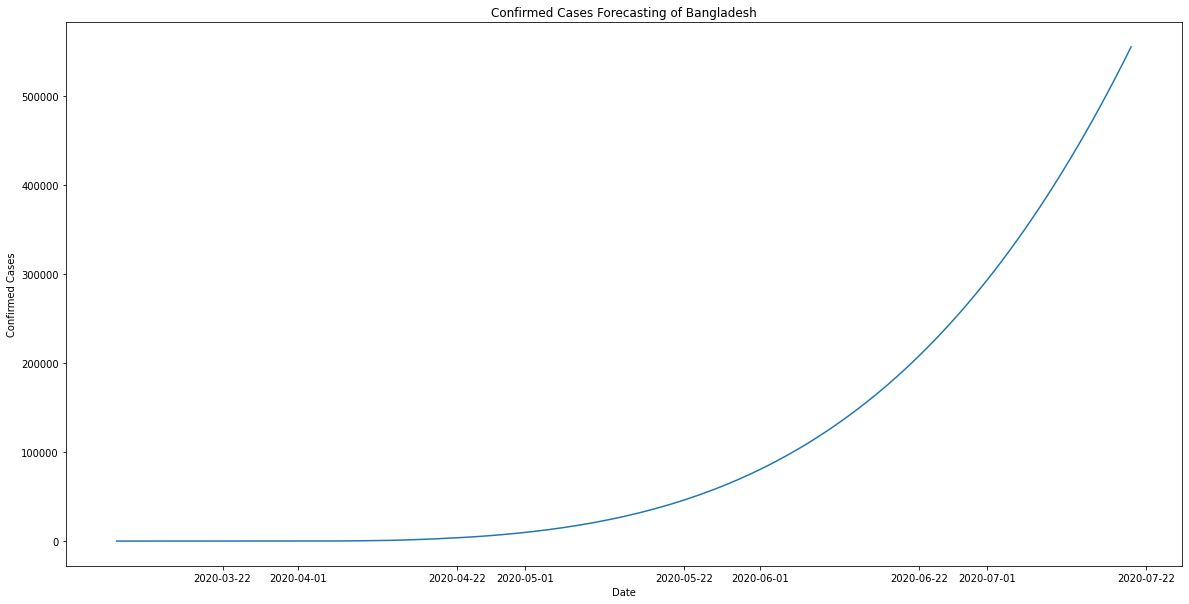

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
plt.plot(dates,y_confirmed)
plt.title('Confirmed Cases Forecasting of Bangladesh')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

Deaths Forecasting

In [12]:
model=Lasso()
model.fit(X_trans, y_ft)
model.score(X_trans, y_ft)
y_pred_ft=np.round(model.predict(X_trans_test))
y_deaths= np.append(y_ft, y_pred_ft)

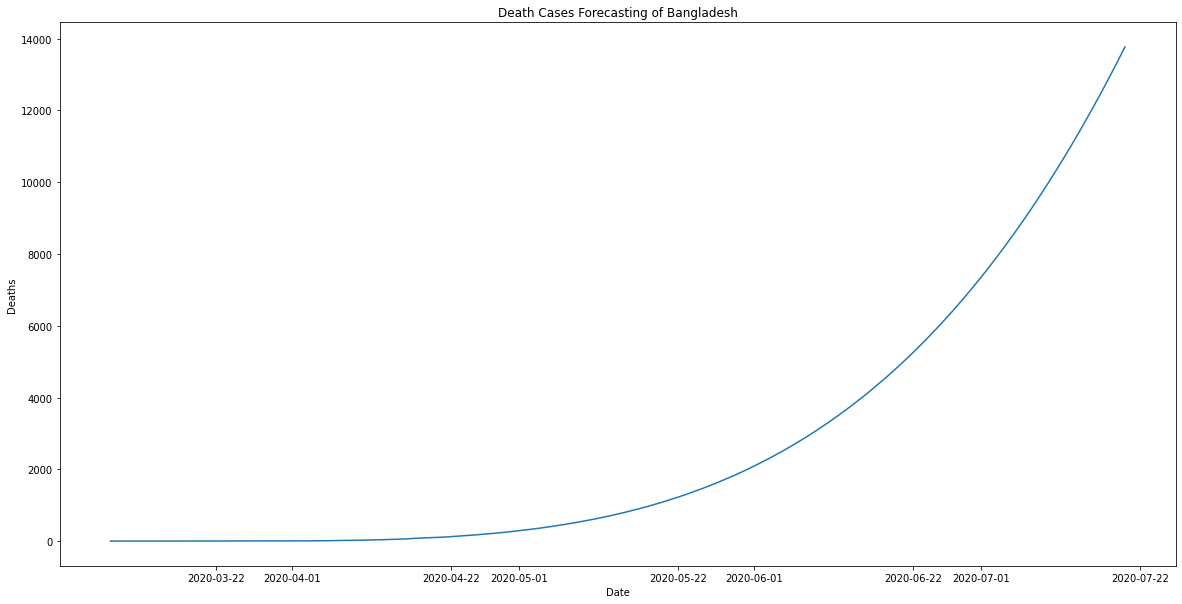

In [13]:
plt.figure(figsize=(20,10))
plt.plot(dates,y_deaths)
plt.title('Death Cases Forecasting of Bangladesh')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.show()

**#StayHome #StaySafe #May Almighty bless us All**